In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn  

## 1. Загружаем данные

In [2]:
url = 'https://raw.githubusercontent.com/PlotnikovArtem/MachineLearningPractice/main/runs.csv'
data = pd.read_csv(url, delimiter='\t',  engine='python')

## 2. Обработка пропущеных значений

In [3]:
data.isna().sum()

race_id               0
horse_no              0
horse_id              0
result                0
won                   0
lengths_behind        0
horse_age             0
horse_country         2
horse_type            2
horse_rating          0
declared_weight       0
actual_weight         0
draw                  0
finish_time           0
win_odds              0
place_odds         3735
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [4]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [5]:
data['horse_country'].fillna(data['horse_country'].mode().iloc[0], inplace=True)
data['horse_type'].fillna(data['horse_type'].mode().iloc[0], inplace=True)
data.isna().sum()

race_id            0
horse_no           0
horse_id           0
result             0
won                0
lengths_behind     0
horse_age          0
horse_country      0
horse_type         0
horse_rating       0
declared_weight    0
actual_weight      0
draw               0
finish_time        0
win_odds           0
place_odds         0
dtype: int64

Столбцы 'horse_country' и 'horse_type' содержат категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [6]:
data['horse_country'] = data['horse_country'].astype('category')
data['horse_type'] = data['horse_type'].astype('category')

In [7]:
data.describe(include=['category'])

,horse_country,horse_type
count,79447,79447
unique,16,9
top,AUS,Gelding
freq,29908,75505


## 3. Обработка категориальных признаков 

К категориальным признакам 'horse_country' и 'horse_type' применим метод бинаризации:

In [8]:
horse_country_dummies = pd.get_dummies(data['horse_country'])
horse_type_dummies = pd.get_dummies(data['horse_type'])

In [9]:
horse_country_dummies.head()

,ARG,AUS,BRZ,CAN,FR,GB,GER,GR,IRE,ITY,JPN,NZ,SAF,SPA,USA,ZIM
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
horse_type_dummies.head()

,Brown,Colt,Filly,Gelding,Grey,Horse,Mare,Rig,Roan
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


Добавим эти dummy-столбцы к таблице и удалим столбцы horse_country и horse_type:

In [11]:
data = pd.concat((data, horse_country_dummies), axis=1)
data = pd.concat((data, horse_type_dummies), axis=1)
data = data.drop(['horse_country', 'horse_type'], axis=1)

In [12]:
data.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,ZIM,Brown,Colt,Filly,Gelding,Grey,Horse,Mare,Rig,Roan
0,0,1,3917,10,0.0,8.00,3,60,1020.0,133,...,0,0,0,0,1,0,0,0,0,0
1,0,2,2157,8,0.0,5.75,3,60,980.0,133,...,0,0,0,0,1,0,0,0,0,0
2,0,3,858,7,0.0,4.75,3,60,1082.0,132,...,0,0,0,0,1,0,0,0,0,0
3,0,4,1853,9,0.0,6.25,3,60,1118.0,127,...,0,0,0,0,1,0,0,0,0,0
4,0,5,2796,6,0.0,3.75,3,60,972.0,131,...,0,0,0,0,1,0,0,0,0,0


## 4. Нормализация количественных признаков

Выполним стандартизацию всех признаков:

In [13]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,ZIM,Brown,Colt,Filly,Gelding,Grey,Horse,Mare,Rig,Roan
count,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,...,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04
mean,-5.303788e-15,-3.725292e-17,-4.205200e-16,2.369161e-16,1.800907e-16,-6.441268e-15,3.185956e-14,-3.872969e-14,-1.712356e-15,-3.874602e-15,...,-1.517767e-14,2.322265e-14,3.447295e-14,4.399669e-15,-2.126771e-14,5.236687e-15,-3.056130e-14,3.812651e-15,6.396766e-15,1.452883e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731139e+00,-1.570348e+00,-1.728882e+00,-1.565099e+00,-2.949890e-01,-1.964817e-01,-1.527602e+00,-4.343844e+00,-6.607369e+00,-3.128962e+00,...,-1.229085e-02,-1.625020e-01,-6.207885e-02,-2.327075e-02,-4.376499e+00,-1.462950e-02,-1.181073e-01,-5.481488e-02,-4.406971e-02,-2.458727e-02
25%,-8.659383e-01,-7.726260e-01,-8.779350e-01,-7.609163e-01,-2.949890e-01,-1.295895e-01,-3.870437e-01,-8.808600e-02,-6.889370e-01,-7.500847e-01,...,-1.229085e-02,-1.625020e-01,-6.207885e-02,-2.327075e-02,2.284903e-01,-1.462950e-02,-1.181073e-01,-5.481488e-02,-4.406971e-02,-2.458727e-02
50%,3.530553e-04,2.509563e-02,3.599449e-03,4.326586e-02,-2.949890e-01,-6.269734e-02,-3.870437e-01,-8.808600e-02,-4.737260e-02,4.287431e-02,...,-1.229085e-02,-1.625020e-01,-6.207885e-02,-2.327075e-02,2.284903e-01,-1.462950e-02,-1.181073e-01,-5.481488e-02,-4.406971e-02,-2.458727e-02
75%,8.680082e-01,8.228172e-01,8.655269e-01,8.474481e-01,-2.949890e-01,1.905979e-02,-3.870437e-01,-8.808600e-02,6.583483e-01,8.358334e-01,...,-1.229085e-02,-1.625020e-01,-6.207885e-02,-2.327075e-02,2.284903e-01,-1.462950e-02,-1.181073e-01,-5.481488e-02,-4.406971e-02,-2.458727e-02
max,1.731845e+00,1.886446e+00,1.725101e+00,1.919691e+00,3.389915e+00,2.951852e+01,7.596867e+00,6.550897e+00,4.235070e+00,1.628792e+00,...,8.136031e+01,6.153691e+00,1.610834e+01,4.297187e+01,2.284903e-01,6.835418e+01,8.466770e+00,1.824299e+01,2.269104e+01,4.067094e+01


## 5. Отбор признаков

In [16]:
X = data_stand.drop(['won'], axis=1)
y = data['won']

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(71502, 7945)

## 6. Обучаем классификатор

In [141]:
from sklearn.neural_network import MLPClassifier

Проверка качества при одном скрытом слое

In [142]:
mlp_model = MLPClassifier(hidden_layer_sizes = (12,),
                          solver = 'lbfgs', activation = 'relu', random_state = 42)

mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.0002517306482064191)

Проверка качества при двух скрытых слоях

In [143]:
mlp_model = MLPClassifier(hidden_layer_sizes = (12,20,), 
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.0002517306482064191)

## 7. Зависимость ошибки от параметра alpha

### Для одного скрытого слоя: 

In [144]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (12,),
                              solver = 'lbfgs', activation = 'logistic', max_iter = 1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

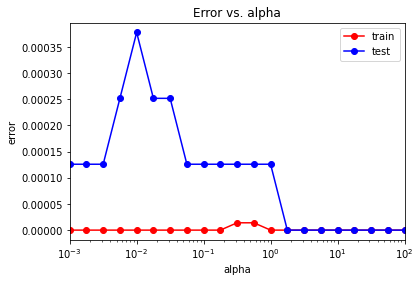

In [145]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])

plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Из графика видно, что переобучения и недообучения не наблюдается, и ошибка на тестовой выборке перестает превышать ошибки на обучающей при alpha > 1,77

Минимальное значение ошибки:

In [146]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


Оптимальное значение alpha:

In [147]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[  1.77827941   3.16227766   5.62341325  10.          17.7827941
  31.6227766   56.23413252 100.        ]


Т.к. получилось больше одного оптимального значения alpha, возьмем первый

In [148]:
alpha_opt_one = alpha_opt[0]

### Для двух скрытых слоев:

In [149]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (12,20,),
                              solver = 'lbfgs', activation = 'logistic', max_iter = 1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

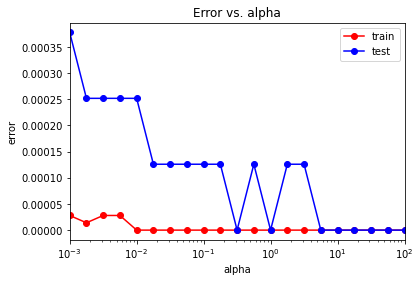

In [150]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])

plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Из графика видно, что переобучения и недообучения не наблюдается, и наблюдается значительное колебание величины ошибки. При увеличении значения alpha ситуация "выравнивается".

Минимальное значение ошибки:

In [151]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


Оптимальное значение alpha:

In [152]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[  0.31622777   1.           5.62341325  10.          17.7827941
  31.6227766   56.23413252 100.        ]


Т.к. получилось больше одного оптимального значения alpha, возьмем первый

In [153]:
alpha_opt_two = alpha_opt[0]

## Классификатор при оптимальном значении alpha

### При одном срытом слое:

In [154]:
mlp_model = MLPClassifier(alpha = alpha_opt_one, hidden_layer_sizes = (12,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)

mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0


### При двух скрытых слоях:

In [155]:
mlp_model = MLPClassifier(alpha = alpha_opt_two, hidden_layer_sizes = (12,20,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)

mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0


## 8. Зависимость ошибки от количества нейронов

### При одном скрытом слое:

In [156]:
neuron_numbers = np.logspace(1, 2, 10)
neuron_numbers = neuron_numbers.astype('int')
test_err = []
train_err = []
for neuron_number in neuron_numbers:
    mlp_model = MLPClassifier(alpha = alpha_opt_one, hidden_layer_sizes = (neuron_number,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42, max_iter = 1000)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

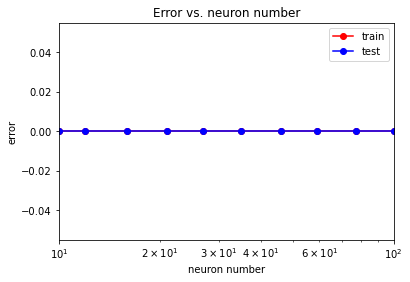

In [157]:
plt.semilogx(neuron_numbers, train_err, 'r-o', label = 'train')
plt.semilogx(neuron_numbers, test_err, 'b-o', label = 'test')
plt.xlim([np.min(neuron_numbers), np.max(neuron_numbers)])

plt.title('Error vs. neuron number')
plt.xlabel('neuron number')
plt.ylabel('error')
plt.legend()
pass

Из графика видно, что количество нейронов не влияет на значение ошибки

Минимальное значение ошибки:

In [160]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


Оптимальное значение neuron number:

In [170]:
neuron_number_opt_one = neuron_numbers[test_err == min_test_err]
neuron_number_opt_one = neuron_number_opt_one[0]

### При двух срытых слоях:

In [162]:
neuron_numbers = np.logspace(1, 2, 10)
neuron_numbers = neuron_numbers.astype('int')
test_err = []
train_err = []
for neuron_number in neuron_numbers:
    mlp_model = MLPClassifier(alpha = alpha_opt_two, hidden_layer_sizes = (neuron_number, neuron_number),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42, max_iter = 1000)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

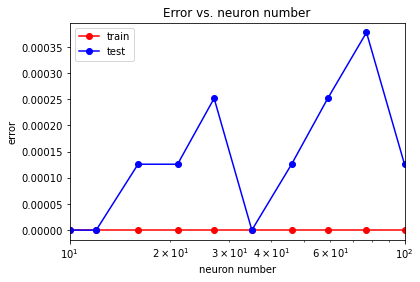

In [163]:
plt.semilogx(neuron_numbers, train_err, 'r-o', label = 'train')
plt.semilogx(neuron_numbers, test_err, 'b-o', label = 'test')
plt.xlim([np.min(neuron_numbers), np.max(neuron_numbers)])

plt.title('Error vs. neuron number')
plt.xlabel('neuron number')
plt.ylabel('error')
plt.legend()
pass

Из графика видно, что наблюдается значительное колебание величины ошибки, но есть некоторые значения neuron number при которых значение ошибок на тестовой и обучающей выборках совпадают.

Минимальное значение ошибки:

In [164]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


Оптимальное значение neuron number:

In [169]:
neuron_number_opt_two = neuron_numbers[test_err == min_test_err]
neuron_number_opt_two = neuron_number_opt_two[0]

## Классификатор при оптимальном значении числа нейронов

### При одном скрытом слое:

In [171]:
mlp_model = MLPClassifier(alpha = alpha_opt_one, hidden_layer_sizes = (neuron_number_opt_one, neuron_number_opt_one),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42, max_iter=1000)

mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.0)

### При двух срытых слоях:

In [172]:
mlp_model = MLPClassifier(alpha = alpha_opt_one, hidden_layer_sizes = (neuron_number_opt_two, neuron_number_opt_two),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42, max_iter=1000)

mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.0)

## 10. Общие выводы

Изходя из полученых решений, можно сделать следующие выводы:

1. При увелечении параметра alpha значение ошибки уменьшается
2. Для данной задачи увелечении количества нейронов не влияет на уменьшение ошибки